In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('E:\digitalent2\Final Project\iris.data', delimiter=',', header=None)
iris.columns = ['SepalLengthcm', 'SepalWidthcm', 'PetalLengthcm', 'PetalWidthcm', 'Species']
iris['Species'] = pd.Categorical(iris['Species'])
print(iris['Species'].cat.categories.tolist())
iris['Species'] = iris['Species'].cat.codes
data = iris.values[:,0:4]
label = iris.values[:, 4]

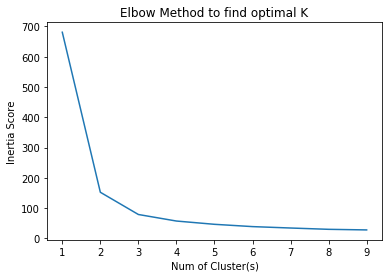

In [2]:
from sklearn.cluster import KMeans

k = 10
hist = []

for i in range(1, k):
    models = KMeans(n_clusters=i)
    models.fit(data)
    hist.append(models.inertia_)

plt.plot(range(1, k), hist)
plt.title('Elbow Method to find optimal K')
plt.xlabel('Num of Cluster(s)')
plt.ylabel('Inertia Score') # Vithin Cluster Sum of Squares (WCSS)
plt.show()

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


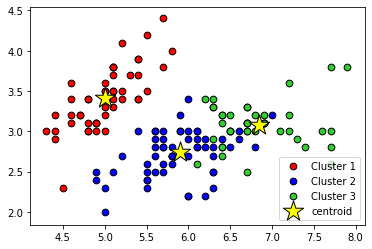

In [3]:
models = KMeans(n_clusters=3)
models = models.fit(data)
predicted = models.predict(data)
print(models.cluster_centers_)

plt.scatter(data[predicted == 0, 0], data[predicted == 0, 1], 
            s = 45, c = 'red', label = 'Cluster 1', edgecolor='k')
plt.scatter(data[predicted == 1, 0], data[predicted == 1, 1], 
            s = 45, c = 'blue', label = 'Cluster 2', edgecolor='k')
plt.scatter(data[predicted == 2, 0], data[predicted == 2, 1], 
            s = 45, c = 'limegreen', label = 'Cluster 3', edgecolor='k')
plt.scatter(models.cluster_centers_[:,0],
            models.cluster_centers_[:,1],
            s = 450, c='yellow', label = 'centroid', edgecolor='k', marker='*')

plt.rcParams['figure.dpi'] = 100
plt.legend()
plt.show()

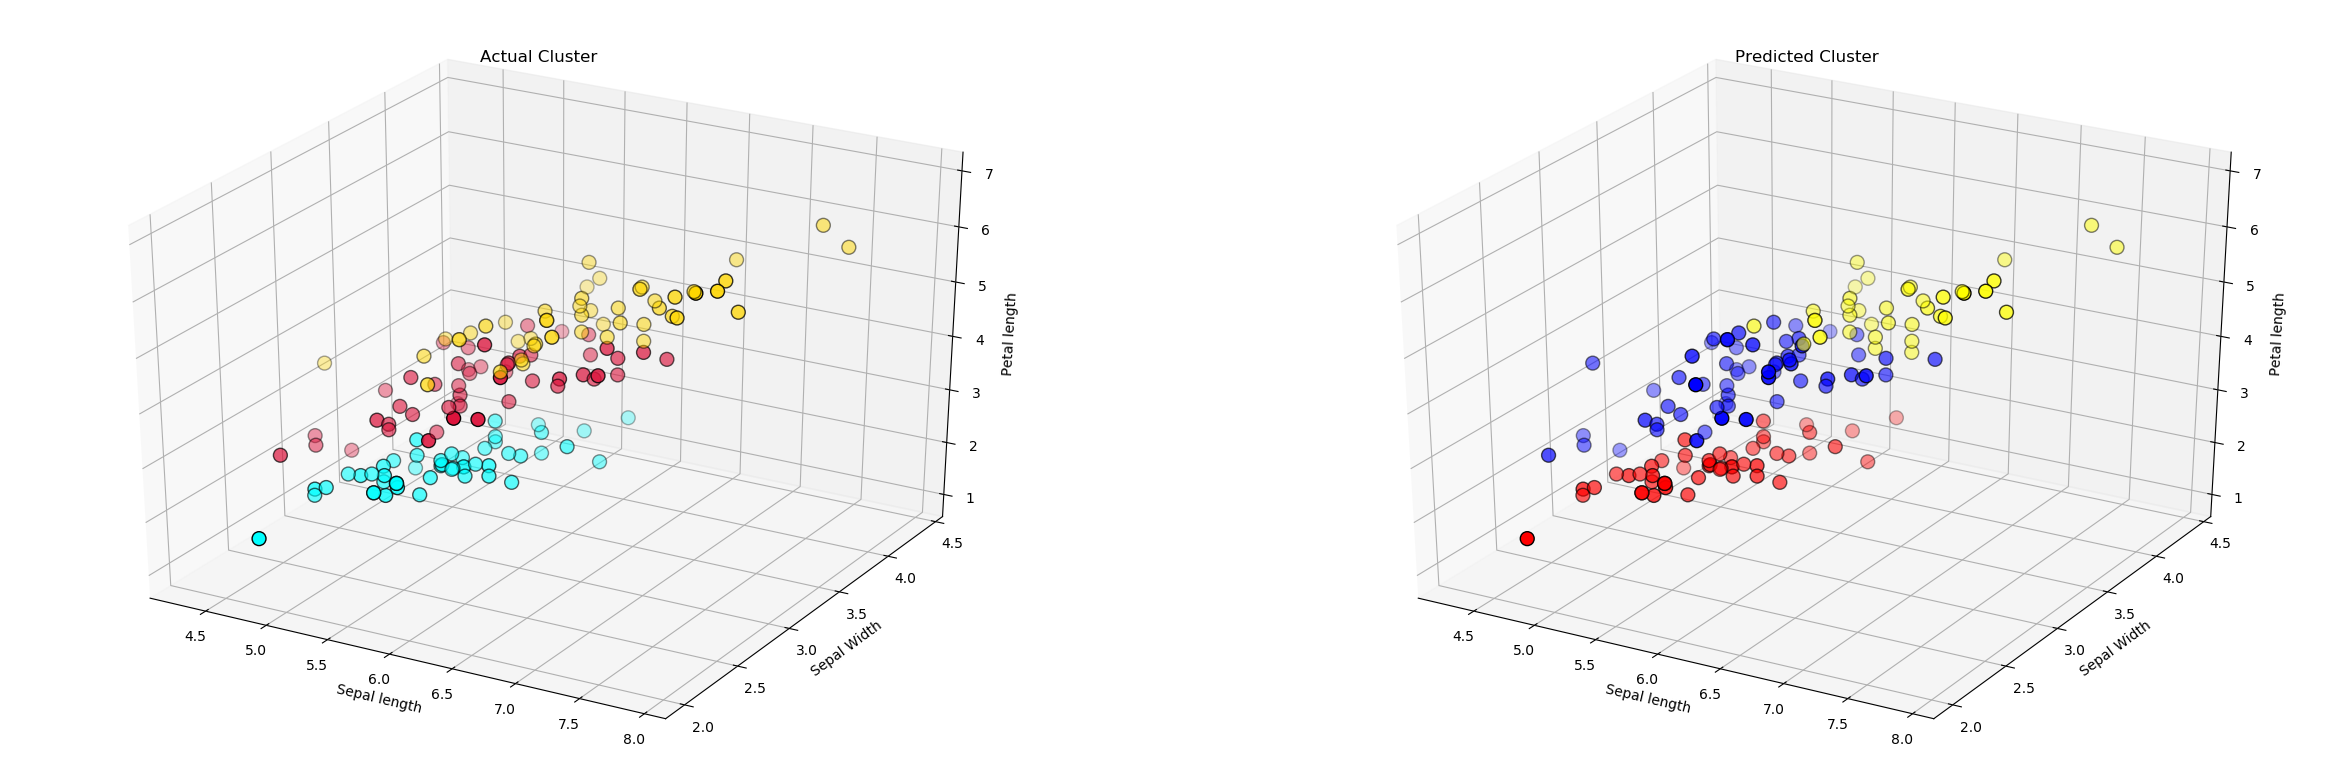

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(figsize=(30,10))
ax = fig1.add_subplot(1,2,1, projection='3d')
ax.scatter(data[label==0,0], data[label==0,1], data[label==0,2], c='cyan', edgecolor='k', s=100)
ax.scatter(data[label==1,0], data[label==1,1], data[label==1,2], c='crimson', edgecolor='k', s=100)
ax.scatter(data[label==2,0], data[label==2,1], data[label==2,2], c='gold', edgecolor='k', s=100)
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal length')
ax.set_title('Actual Cluster')

ax = fig1.add_subplot(1,2,2, projection='3d')
ax.scatter(data[predicted==0,0], data[predicted==0,1], data[predicted==0,2], c='red', edgecolor='k', s=100)
ax.scatter(data[predicted==1,0], data[predicted==1,1], data[predicted==1,2], c='blue', edgecolor='k', s=100)
ax.scatter(data[predicted==2,0], data[predicted==2,1], data[predicted==2,2], c='yellow', edgecolor='k', s=100)
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal length')
ax.set_title('Predicted Cluster')

plt.show()